# RANDOMFOREST 14072022

In [4]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [5]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
# Load the Loan data

LoanData = pd.read_csv("/home/lab3/Music/21B95A0529/14072022/loan_data", header=0)

# Copy to back-up file

LoanData_bk = LoanData.copy()

# Display first 5 values

LoanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
# Display the Loan data information

LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
# Change the name of variable

LoanData = LoanData.rename(columns = {'not.fully.paid': 'NFPaid'}, inplace = False)

# Copy the file to backup

LoanData_bk2 = LoanData.copy()

# Display first 5 records

LoanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Target_count = LoanData.NFPaid.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total loans Trans:', len(LoanData))

Class 0: 8045
Class 1: 1533
Proportion: 5.25 : 1
Total loans Trans: 9578


In [10]:
# Displaying Duplicate values with in Loan ataset, if avialble

LoanData_dup = LoanData[LoanData.duplicated(keep='last')]
LoanData_dup

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid


In [11]:
# Count the missing values by each variable, if available

LoanData.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
NFPaid               0
dtype: int64

In [12]:
# Apply dummy variable function on 'purpose' categorical variable

cat_cols = ['purpose']

LoanData = pd.get_dummies(LoanData,columns=cat_cols)

LoanData = pd.DataFrame(LoanData)

LoanData.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [13]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in LoanData.columns:
    if col != 'NFPaid':
        IndepVar.append(col)

TargetVar = 'NFPaid'

x = LoanData[IndepVar]
y = LoanData[TargetVar]

In [14]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [15]:
# Display all the variable in the loan dataset

LoanData.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'NFPaid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [16]:
# Identify variable which are suppose to normilize the values

mm_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[mm_cols] = mmscaler.fit_transform(x_train[mm_cols])
x_train = pd.DataFrame(x_train)

x_test[mm_cols] = mmscaler.fit_transform(x_test[mm_cols])
x_test = pd.DataFrame(x_test)

In [18]:
# To build the 'Multinominal Decision Tree' model with random sampling

from sklearn.ensemble import RandomForestClassifier

ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelRF.predict_proba(x_test)[:,1])
plt.figure()

Confusion matrix : 
 [[   8  458]
 [  17 2391]]
Outcome values : 
 8 458 17 2391
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.02      0.03       466
           0       0.84      0.99      0.91      2408

    accuracy                           0.83      2874
   macro avg       0.58      0.51      0.47      2874
weighted avg       0.76      0.83      0.77      2874

Accuracy : 83.5 %
Precision : 32.0 %
Recall : 1.7 %
F1 Score : 0.033
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 50.5 %
MCC : 0.04
roc_auc_score: 0.505


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

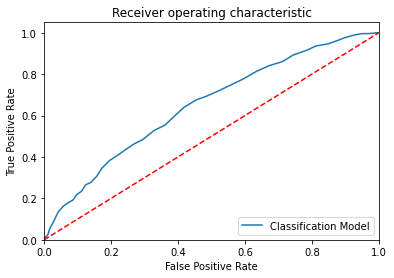

In [19]:
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

Feature: 0, Score: 0.01654
Feature: 1, Score: 0.10206
Feature: 2, Score: 0.11290
Feature: 3, Score: 0.10839
Feature: 4, Score: 0.10849
Feature: 5, Score: 0.08107
Feature: 6, Score: 0.11318
Feature: 7, Score: 0.10984
Feature: 8, Score: 0.10861
Feature: 9, Score: 0.05415
Feature: 10, Score: 0.01373
Feature: 11, Score: 0.00988
Feature: 12, Score: 0.01276
Feature: 13, Score: 0.00789
Feature: 14, Score: 0.01308
Feature: 15, Score: 0.00710
Feature: 16, Score: 0.00734
Feature: 17, Score: 0.00422
Feature: 18, Score: 0.00875


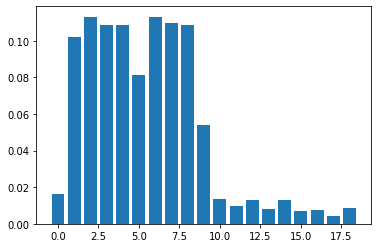

In [20]:
# To get feature importance

from matplotlib import pyplot

importance = ModelRF.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
# Results

PredResults = pd.DataFrame({'NFPaid_A':y_test, 'NFPaid_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = LoanData_bk2.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid,NFPaid_A,NFPaid_P
6878,1,major_purchase,0.1426,51.46,11.472103,15.97,662,8220.041667,16964,77.8,1,0,0,0,0,0
58,1,credit_card,0.1249,401.37,11.225243,15.00,682,4479.000000,43039,93.4,3,0,0,0,0,0
9095,0,all_other,0.1284,268.95,11.211874,13.83,722,4770.000000,4505,25.3,5,0,0,0,0,0
6792,1,all_other,0.1114,164.02,11.289782,11.07,722,4800.000000,918,35.3,1,0,0,0,0,0
9316,0,home_improvement,0.1183,256.79,10.736310,13.31,722,4560.000000,7562,57.7,4,0,0,1,1,0
2907,1,debt_consolidation,0.1284,504.27,10.915088,14.99,712,6629.958333,9483,57.8,0,0,0,0,0,0
8706,0,all_other,0.1608,149.59,10.463218,26.36,667,6960.000000,6644,35.9,12,0,0,0,0,0
4484,1,debt_consolidation,0.0894,428.13,11.245046,18.70,747,5639.958333,33660,45.0,0,0,0,0,0,0
7968,0,educational,0.1091,326.97,10.668955,4.19,682,630.000000,58,7.2,1,0,0,1,1,0
5458,1,debt_consolidation,0.1739,716.95,11.626254,8.88,667,4200.000000,20755,89.5,2,0,0,0,0,0
